# Data Wrangling Tutorial in R

This tutorial is meant to illustrate how to display spatial data from the cycle_hire_osm and lnd datasets from the spData package.  We will create a buffer of stops, calculate the area they cover, and count the number of cycle hire locations in each borough of London.  This tutorial was adapted heavily from Geocomputation with R and Marynia Kolak's POSTGIS to R tutorial.
First, here are the packages to load:

In [1]:
library(spData)
library(tmap)
library(sf)

Linking to GEOS 3.6.1, GDAL 2.1.3, PROJ 4.9.3


In [2]:
# Load the data
data("cycle_hire_osm")
data("lnd")

Let's do a preliminary display of the data using tmap.  This will display where the cycle hire spots are in London.  

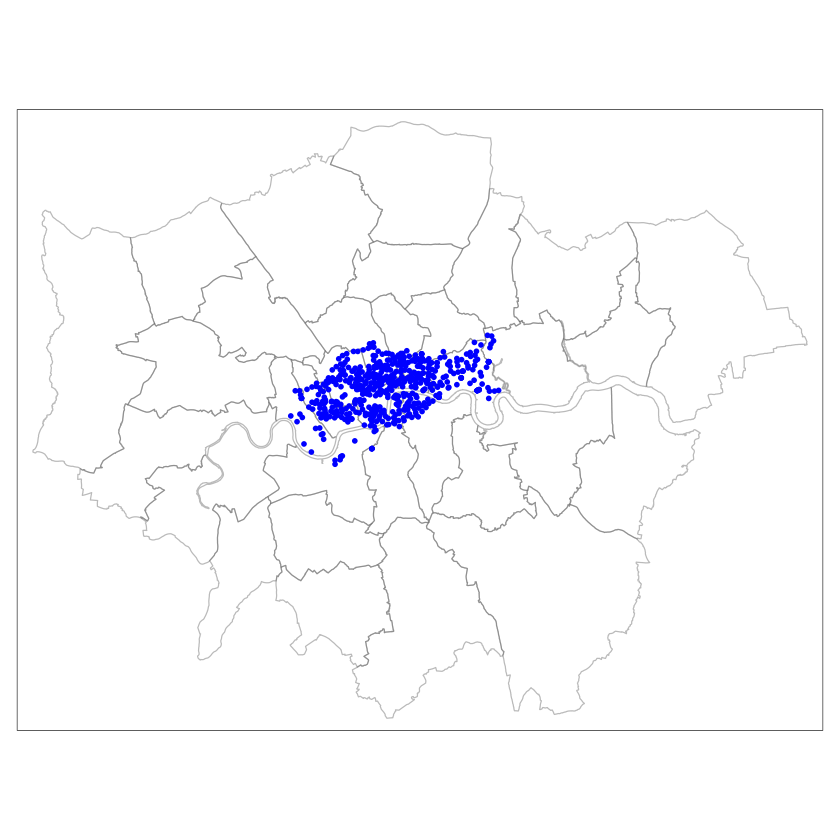

In [4]:
tm_shape(lnd) + tm_borders(alpha=.4) +
tm_shape(cycle_hire_osm) + tm_dots(size=0.1,col="blue",style="cat",legend.size.show = FALSE)


This is a little too zoomed in for our preferences, so let's set a bounding box at the beginning of the map command in order to zoom in on the places we're interested in.  This is done easily by setting the bounding box (bbox) with the extents of the cycle_hire_osm data.  

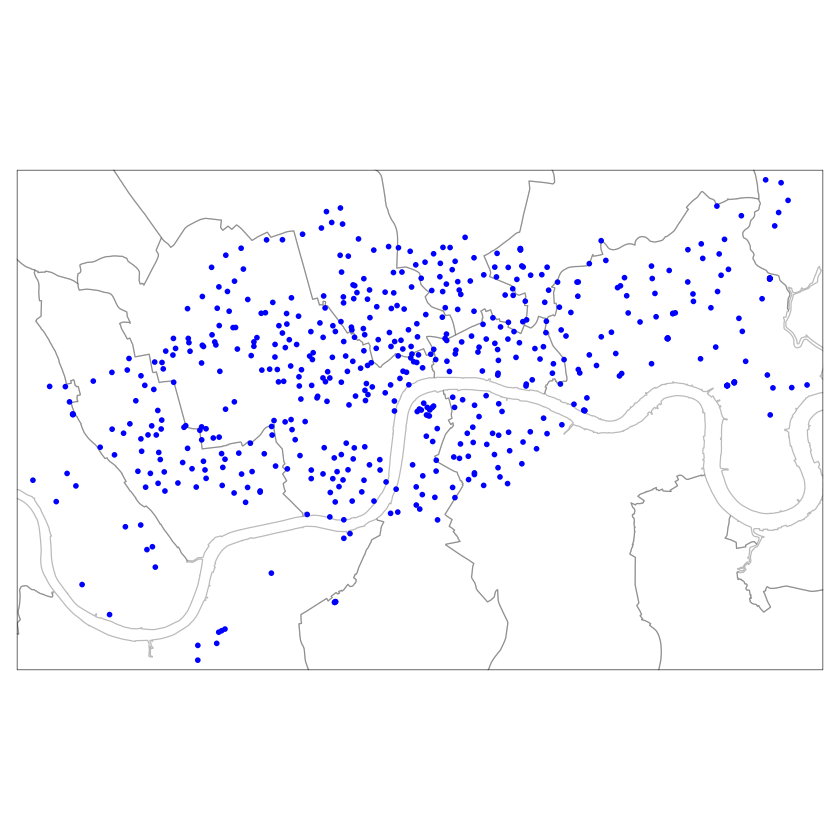

In [5]:
tm_shape(lnd, bbox = cycle_hire_osm) + tm_borders(alpha=.4) +
tm_shape(cycle_hire_osm) + tm_dots(size=0.1,col="blue",style="cat",legend.size.show = FALSE,title = "London Bikes")

Now we'd like to create a buffer around the cycle hire stops, but the current projection (EPSG: 4326) has its units in degrees, not meters or something similar.  First, we'll reproject our data, then use it to make a buffer.

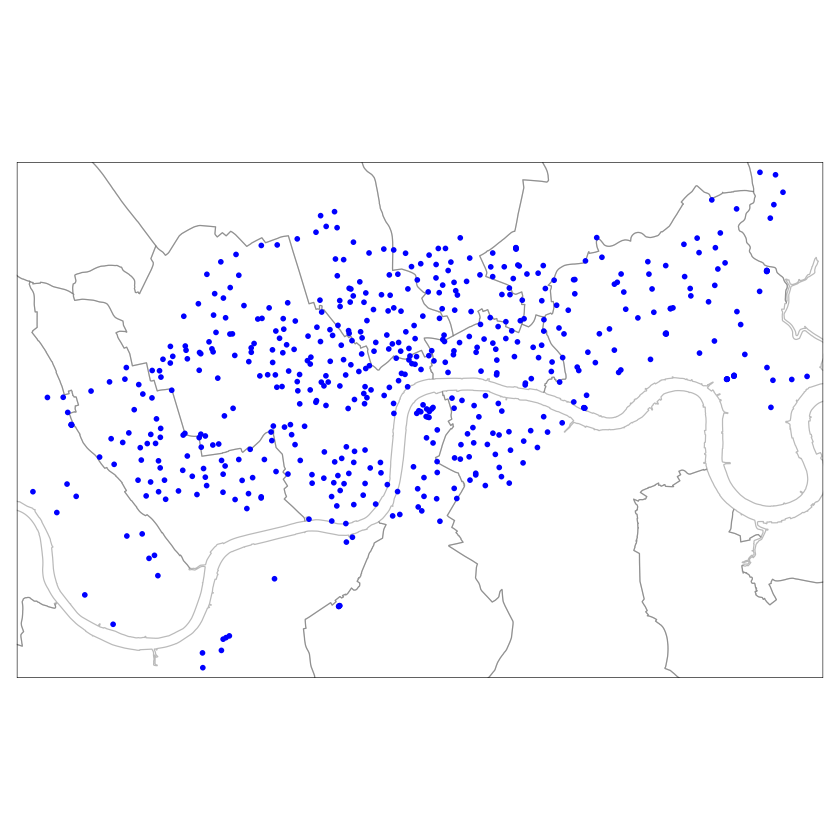

In [6]:
cycle_m = st_transform(cycle_hire_osm, 27700)
lnd_m = st_transform(lnd, 27700)

tm_shape(lnd_m, bbox = cycle_m) + tm_borders(alpha=.4) +
  tm_shape(cycle_m) + tm_dots(size=0.1,col="blue",style="cat",legend.size.show = FALSE,title = "London Bikes")


The data has been reprojected and seems to work, so now, let's create a standard 5-minute buffer (400 meters) in our new projection.  

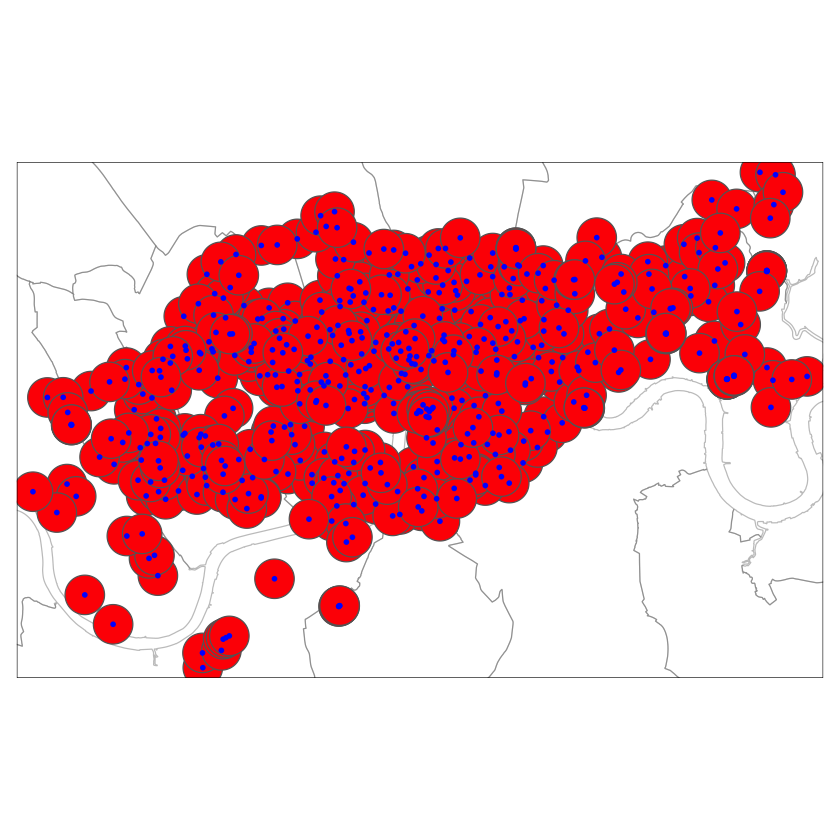

In [7]:
cy_buff = st_buffer(cycle_m, 400)

tm_shape(lnd_m, bbox = cycle_m) + tm_borders(alpha=.4) + tm_shape(cy_buff) + tm_polygons(col="red") + 
  tm_shape(cycle_m) + tm_dots(size=0.1,col="blue",style="cat",legend.size.show = FALSE) 

Now, say you wanted to use these buffers to see how much of London was within 5 minutes of a cycle hire station.  We will use the sf command st_union to dissolve the buffer layer, and then calculate the area.

In [8]:
cy_unbuff = st_union(cy_buff)
st_area(cy_unbuff)

74638561 [m^2]

Finally, let's see what a map of this dissolved area would look like.  

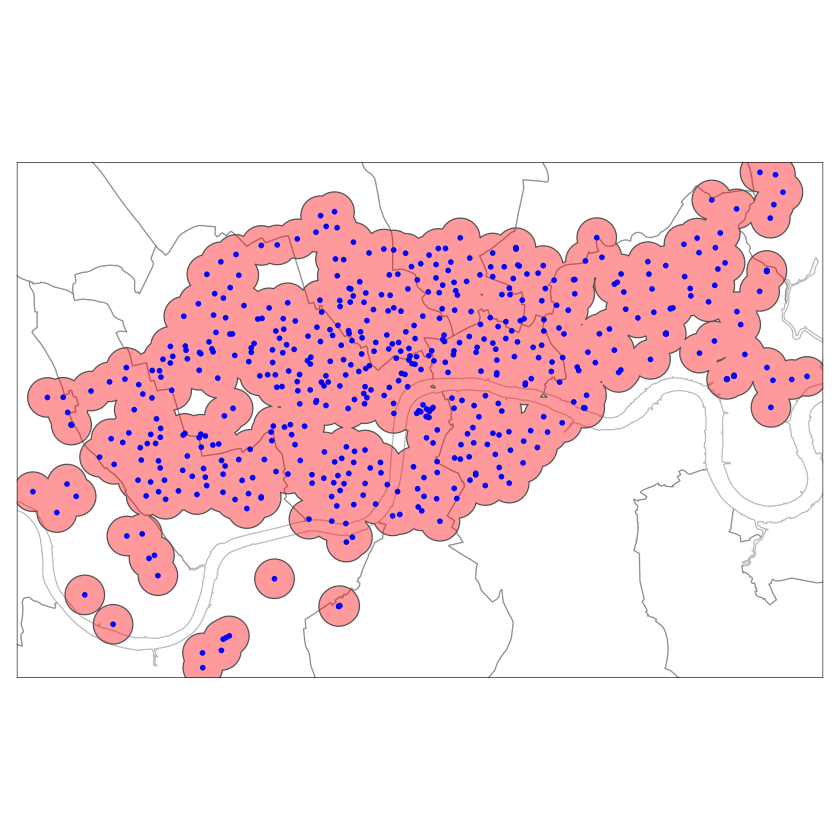

In [10]:
tm_shape(lnd_m, bbox = cycle_m) + tm_borders(alpha=.4) + 
tm_shape(cy_unbuff) + tm_polygons(col="red", alpha=.4) + 
  tm_shape(cycle_m) + tm_dots(size=0.1,col="blue",style="cat",legend.size.show = FALSE,title = "London Bikes") 
